In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Ibi semper est victoria ubi concordia est

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
Translated "Where there is union there is always victory", words said more than 2000 years ago but still valid and also applicable to football. 
<br><br>The analysis begins with the analysis of the quarterback, considered the brains of the offence team. 
Specifically, a graph will be presented that highlights how it is possible to correlate the time that passes between the snap and the launch and the outcome of it. 
<br><br>
Subsequently the defense will be analyzed and it will be shown how players away from the game or idle, produce a significant advantage for the offence (11-10 or 11-9) which often results in a complete pass.<br><br>
Specifically:<br><br>  
    
1) A partial result on how a player out of the game, i.e. with a distance greater than 4 yards from the opponent, produces a disadvantage for the defense.<br>
2) A reliable result that a defender who does not move in early phase of the action produces a significant advantage for the attack

</div>


# Analyze Cerebri 

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
The analysis begins, as the name says in Latin, by analyzing the brain ie the quarterback. 
<br><br>On throws he is the protagonist, there are many analyzes on quarterbacks. I suggest another analysis that can be considered useful for the study of the quarterback and therefore to optimize defensive performance on throws.
<br><br>
Figure 1: Tom Brady snap and throw graph
    
</div>

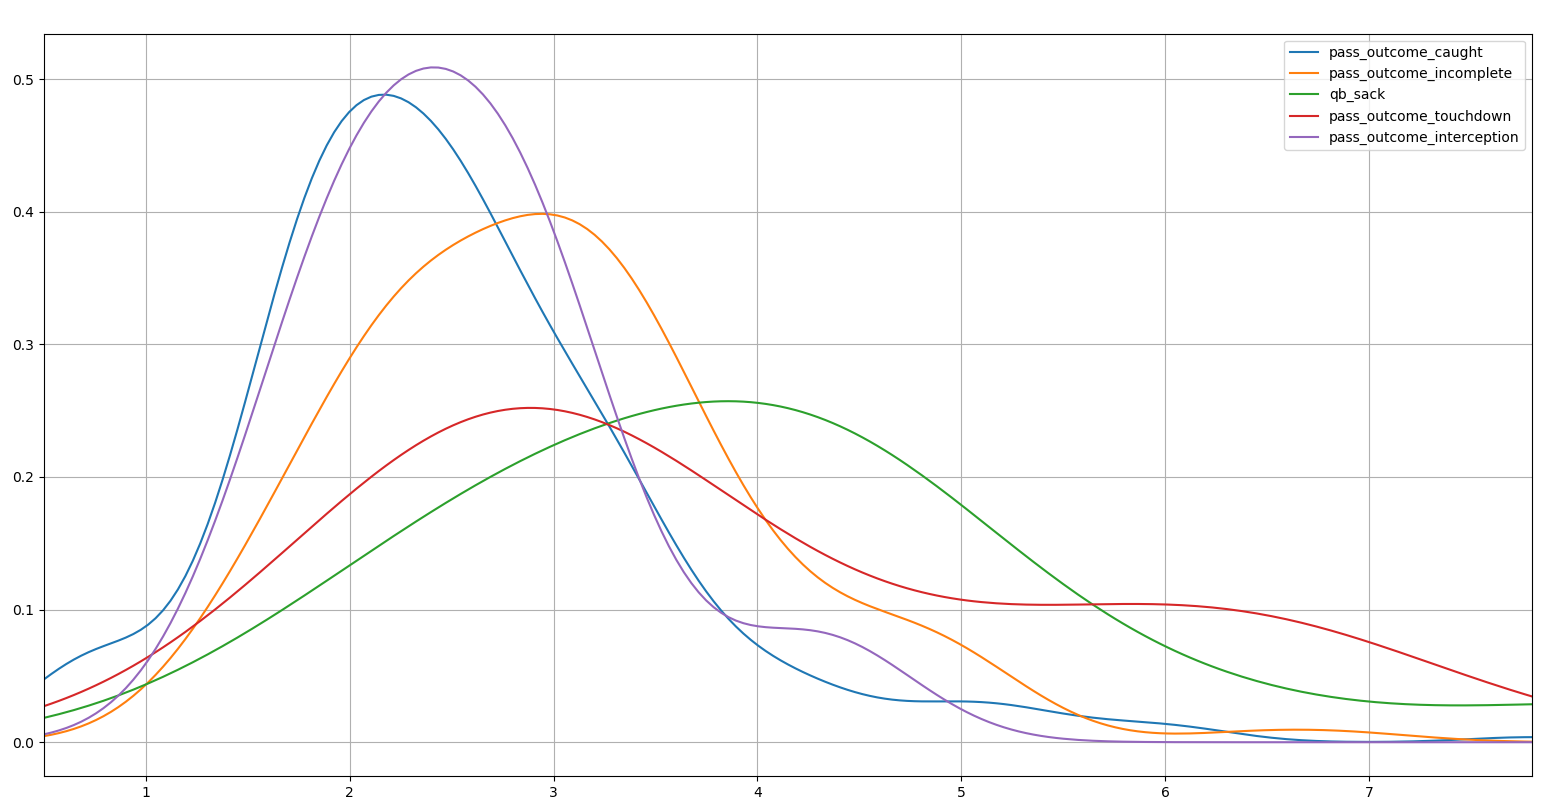

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
Graph (Figure 1) is constructed by considering the time between the snap of the ball and the throw, in this case by Tom Brady, analyzed because he is the quarterback of the team that won the Super Bowl that season. The lines represented the data density function and each color represents a different outcome of the action.<br><br>  
This allows us to establish that if Brady's throw starts within 2 seconds of the snap there is a high probability that it will be complete. If, on the other hand, the throw starts 3 seconds after the snap, the most likely outcomes are those of an incomplete pass. When 4 seconds pass from the snap, the probability of Brady risking the sack increases.
</div>

# Ex Aequo

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
The title mean "at par" because on pitch it play 11 vs 11.
<br><br>
First of all, two definition:<br><br>
        
1) A player will be in an "far" state when their distance from the closest opposing player is more than 4 yards.<br><br>
    
2) A player will be in an "idle" state when the distance travel between snap e throw is less than 1.5 yards.<br><br>

This analysis instead takes its cue from the vision of some actions that took place in 2018. Specifically Baltimore Ravens vs. Tennessee Titans (Figure 2) and Dallas Cowboys vs. San Francisco 49ers (Figure 3). They are two actions with "far" state players but with two completely different outcomes.
<br> 
</div>


<div class="alert alert-block alert-info"> 
    To avoid copyright issues the actions are reproduced for educational purposes, the original action is on the official NFL channel at this link:https://www.youtube.com/watch?v=h98-PmRO43I [ start at minute 2:14 ]
    </div>

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
Figure 2: Baltimore Ravens vs. Tennessee Titans    
</div>

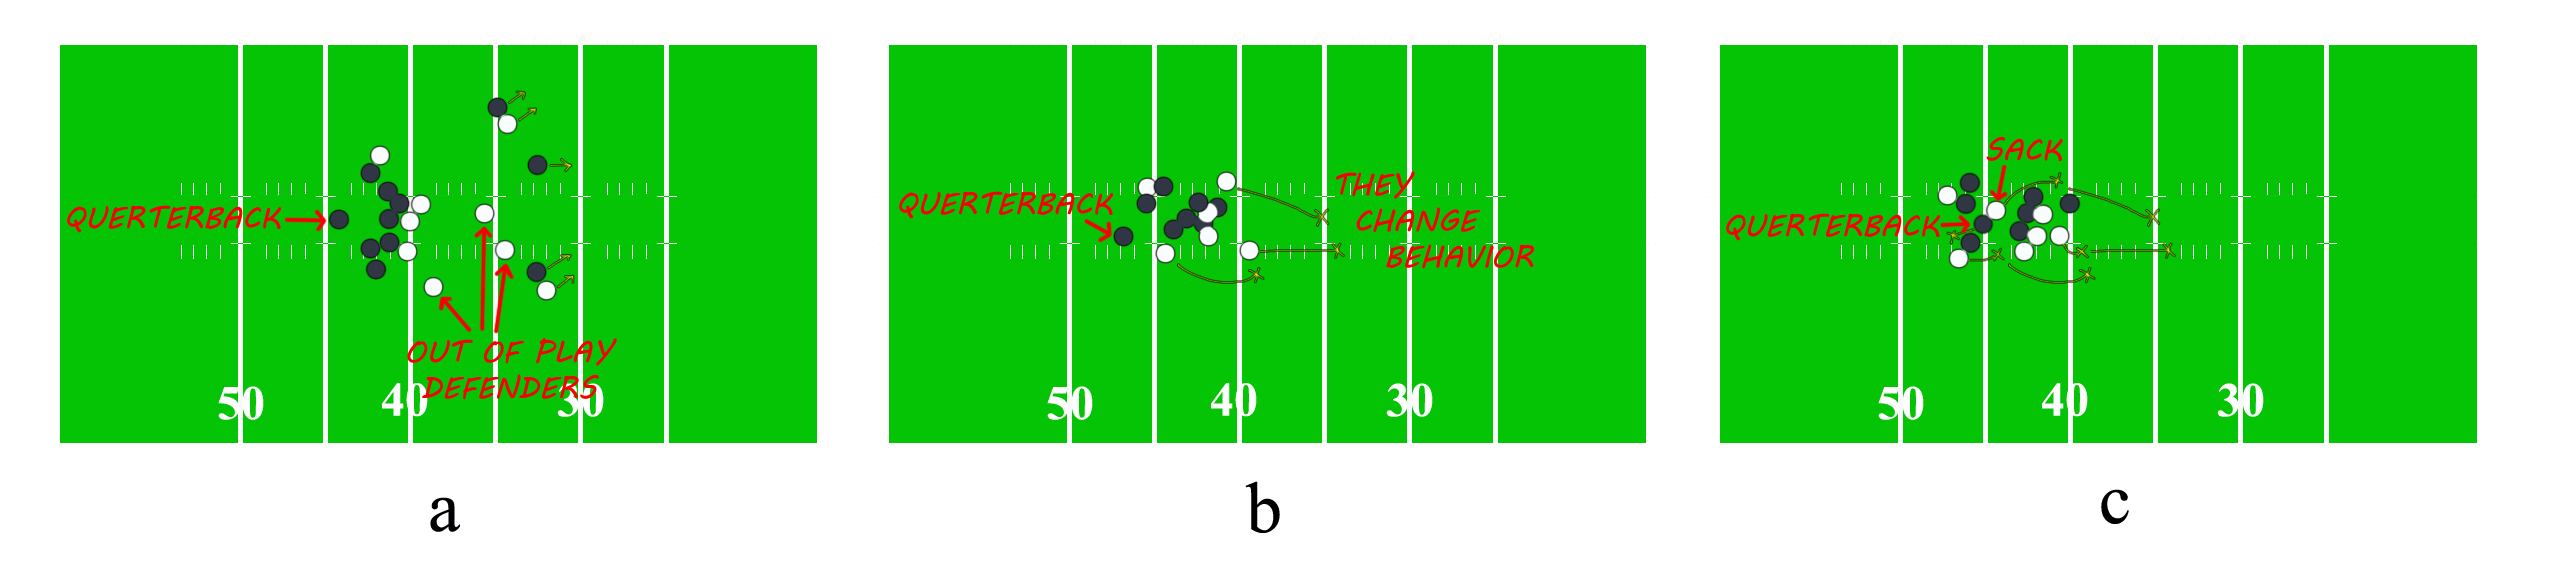

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
As you can see in image (Figure 2a) there are 3 players in "far", in image (Figure 2b) instead they change their attitude and attack the offensive formation of the Titans. They aren't in idle state. The action finishes with a sack after approximately 3.5 seconds from the snap.<br>
</div>

<div class="alert alert-block alert-info"> 
        To avoid copyright issues the actions are reproduced for educational purposes, the original action is on the official NFL channel at this link: https://www.youtube.com/watch?v=dNN6mglnbRA [ start at minute 2:38 ]
</div>

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">   
  
Figure 3: Dallas Cowboys vs. San Francisco 49ers (Preseason)
    
</div>
        
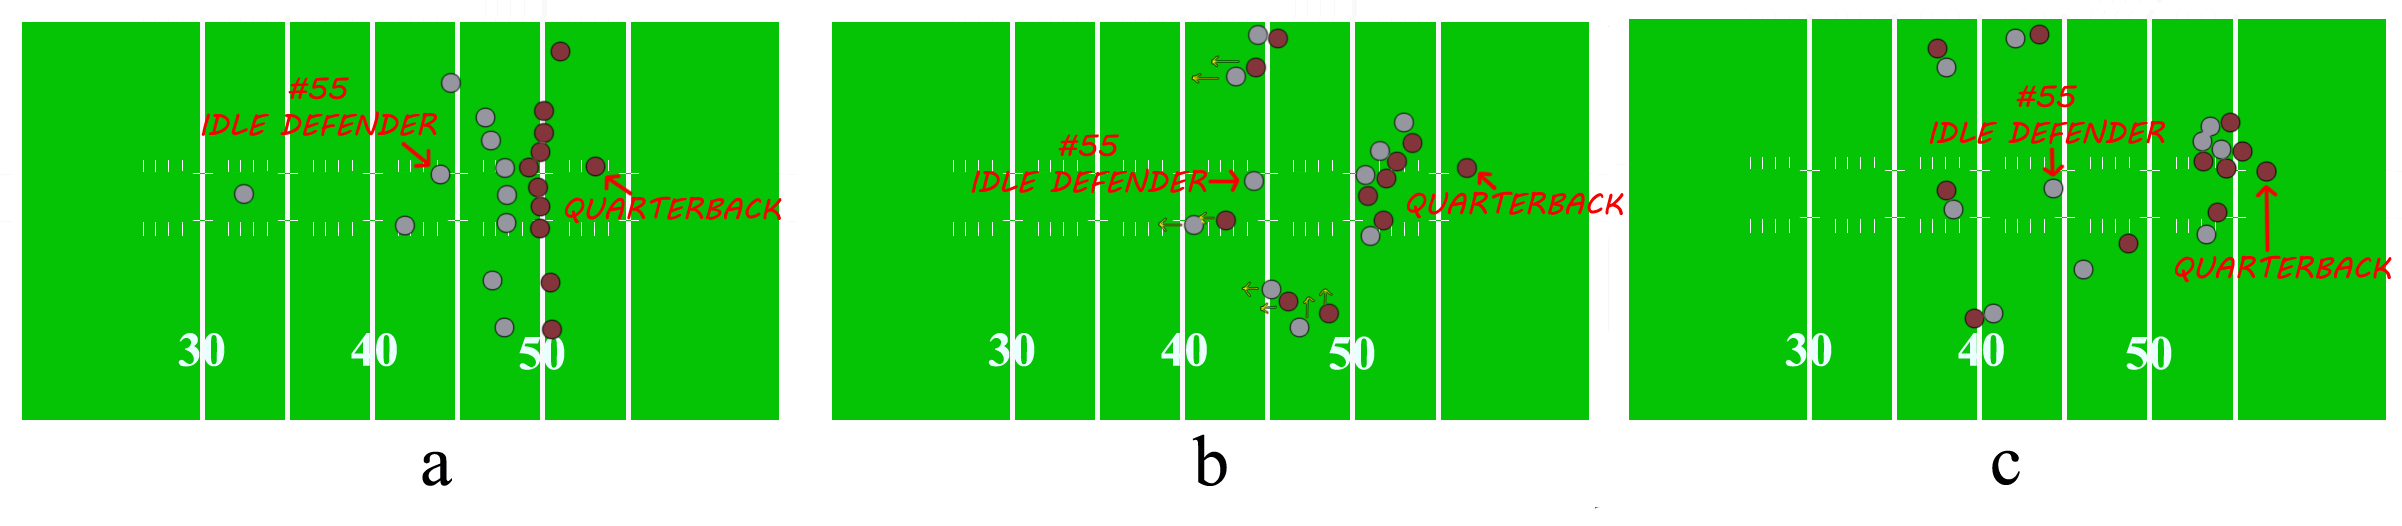

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
This sequence, on the other hand, will end with a complete pass, even thanks a good catch.<br> 
It can be seen that player number 55 is far and idle state for all the action, causing an 11 vs 10 against his team. Considering that about 3.5 seconds pass between the snap and the launch, player 55 had plenty of time to do something useful for his team
<br><br>
Two other examples where in the first ( Figure 4a "Philadelphia Eagles  vs. Tennessee Titans") there are 2 nearby defenders in a not very useful position, in the second  (Figure 4b "Dallas Cowboys vs. Houston Texans") 4 defenders not used.<br>
</div> 

<div class="alert alert-block alert-info"> 
    For the same reasons as the two previous figures, the link:<br><br>
    - Figure 4a: https://www.youtube.com/watch?v=73-GxdyifnU [start at minute 13:10]<br>    
    - Figure 4b: https://www.youtube.com/watch?v=zOEkW-lyq2k [start at minute 13:03] 
</div> 

   
    
<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">

Figure 4: Philadelphia Eagles  vs. Tennessee Titans | Dallas Cowboys vs. Houston Texans 
    
</div>
    
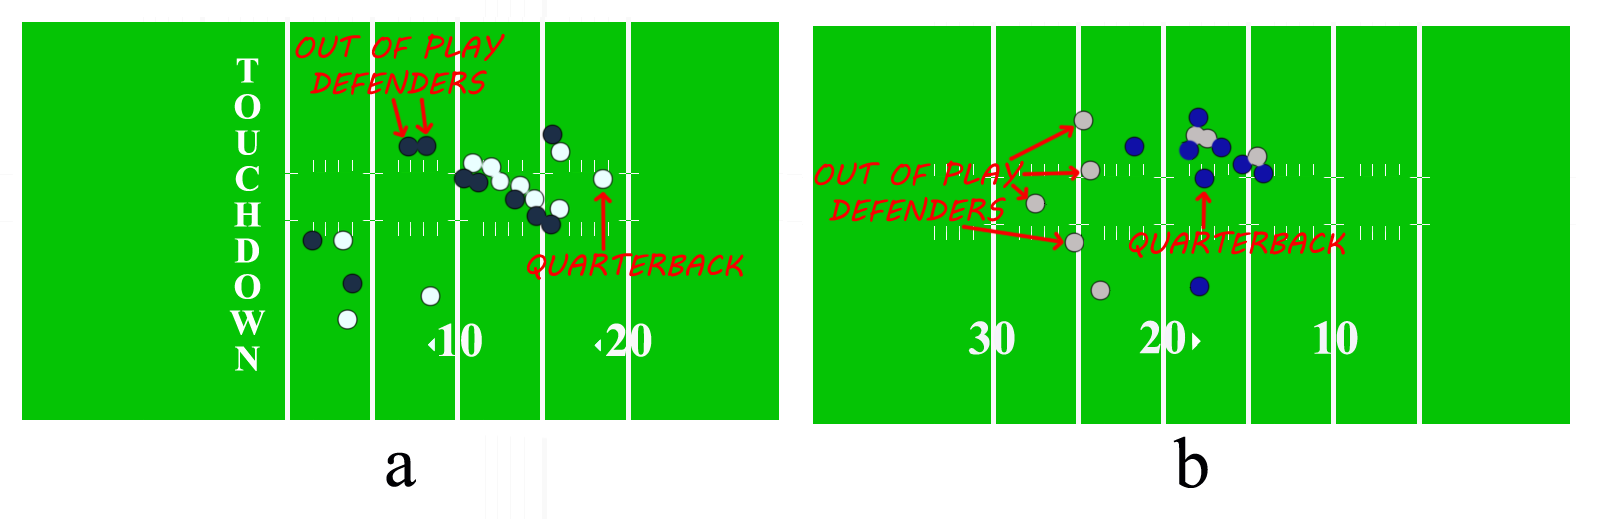
    
<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
<b>What can be observed?</b><br><br>
    Returning to the two actions previously taken as an example, one noticeable difference is the effectiveness of the defense: in the first case the defense makes the offense retreat in the second case not. One of the causes is due to the fact that the Baltimore defense did not have players in prolonged "idle", but they changed their task into a functional one.<br><br>
<b>So how do you find these situations?</b><br><br>
    In two way, calculating the position of players "far" and the players in "idle" between the snap and the quarterback's throws. The calculation by having the positions of the players is very simple. 
    The main problem is the fact of having partial data as not all 22 position of the players are into the dataset, so the data reported below are certainly not correct for "far" defenders.
    
</div>

# Far defender

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
    
From the calculation made it can be seen that in 14695 plays on 19239, that is 76.38%, there was at least one defender at least 4 yards from an opposing player excluding Safety.
    
<br><br>
    
<p>Table 1</p> 
</div>
<table style="font-size:16px;">
  <tr>
    <th>Type</th>
    <th>Number of plays</th>
    <th>Percentage on total plays</th>
  </tr>
  <tr>
    <td>Total plays</td>
    <td>19239</td>
    <td></td>
  </tr>
  <tr>
    <td>Offense complete pass</td>
    <td>11370</td>
    <td>59,10%</td>
  </tr>
  <tr>
    <td>Offense not complete pass</td>
    <td>7869</td>
    <td>40,90%</td>
  </tr>
  <tr>
    <td>Offense complete pass with a defender at least 4 yard</td>
    <td>9465</td>
    <td>49,19%</td>
  </tr>
  <tr>
    <td>Offense not complete pass with a defender at least 4 yard</td>
    <td>5230</td>
    <td>27,18%</td>
  </tr>
</table>
    


<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
    
<br><br>     
So the 76,38% of pass plays had a defender at least 4 yards away from the opponent, the 49,19% end with a complete pass versus 27.18% of incomplete pass.
<br><br>
A significant difference also because the ratio referred only to the type of play is:<br>
    
1) 9465 / 11370  = 83,24%<br>    
2) 5230 / 7869 =  66,46%<br><br>
    
</div>

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">    
A gap of 16.78 percentage points, it would be interesting to be able to repeat the calculations with all the players to see if this gap remains so large. If the margin will remain so large, it means that an action with a defender "far" has a high risk that its the outcome is a complete pass. The second effect is that this statistic could be added to those already used to calculate defensive efficiency.
    
</div>



 # Idle defender

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
    
The calculation of "idle" defenders is been done on the same number of plays of "far" defenders, include all defenders this time. In this case the data for calculation are all present into dataset excluding DL,  so the result is reliable.
<br><br>
    
<p>Table 2</p> 
<table style="font-size:16px;">
  <tr>
    <th>Type</th>
    <th>CB</th>
    <th>LB</th>
    <th>S</th>
    <th>DL</th>
  </tr>
  <tr>
    <td><b>Incomplete pass</b></td>
    <td>18,74%</td>
    <td>23,31%</td>
    <td>23,38%</td>
    <td>21,37%</td>
  </tr>
  <tr>
    <td><b>Complete pass</b></td>
    <td>79,26%</td>
    <td>73,55%</td>
    <td>73,66%</td>
    <td>74,64%</td>
  </tr>
  <tr>
    <td><b>Sack</b></td>
    <td>1,18%</td>
    <td>1,81%</td>
    <td>1,36%</td>
    <td>2,28%</td>
  </tr>
  <tr>
    <td><b>Interception pass</b></td>
    <td>0,82%</td>
    <td>1,34%</td>
    <td>1,60%</td>
    <td>1,71%</td>
  </tr>
</table>
 
</div>
<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">    
<br><br>    
The result represents the percentage of actions ended with a specific outcome (first column) with at least a defender in "idle". The maximum numbers are into row of complete pass, for the CB close to 80%. Overall the complete pass stay at 75,55% and the incomplete pass at 21,71%.
<br><br> 
The following table (Table 3) is the top 20 cornerback ranking less idle, considering the players with high number participation of action (so starting players)   
<br><br>
    
    
Table 3    
</div>

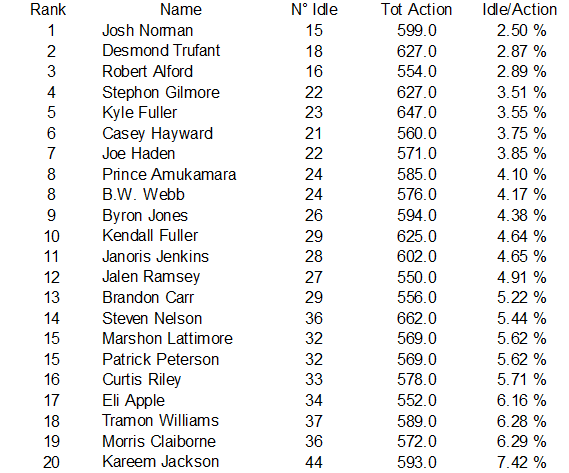
    
<br><br> 
<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">    
This table (Table 3) is only a ranking of a characteristic and not the ranking of overall player, but  it can be used, for the evaluation of a player adding him a characteristic. In this top-20 are present some of the better cornerback of the league 2018, according to the football websites in 2018.
This may not be accidental. 
</div>





# Conclusion

<div style="font-size:16px;margin-left:1%;margin-right:5%;text-align: justify;">
The result of this analysis leads to the consideration that often the defense for various reasons does not use effectively all 11 men unlike the at offense where it is difficult to have players in "idle". Adding also the fact of distance from the opposing players, it all decreases the defensive efficiency and gives a great advantage for the offence, so this aspect can be improved. Unfortunately, one notebook can only try to explain a tiny part of football, on which many more books are and will be written. I hope the notebook will be read and why not, give some ideas to improve the football defense. I conclude with a sentence from Tom Landry "Football is an incredible game. Sometimes it's so incredible, it's unbelievable. ".
<br><br>
Thanks for reading and good football to everyone!
</div>

In [ ]:
# CODE FOR FIGURE 1



# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os, glob
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import time
import pandas as pd
import os.path

start_time = time.time()



path = r'/kaggle/input/nfl-big-data-bowl-2021/' # path
all_files = glob.glob(path + "/week*.csv")
li = []

for filename in all_files:
    #print("Load",filename)
    action_topass = ['ball_snap',
                     'pass_forward',
                     'qb_sack',
                     'pass_outcome_touchdown',
                     'pass_outcome_caught',     
                     'pass_outcome_incomplete',
                     'pass_outcome_interception']

    action_topass_skip = ['pass_forward',
                          'qb_sack']


    ball = pd.read_csv(filename)
    pd.set_option('max_columns', None)

    ball = ball.drop(columns=['playDirection', 'x', 'y', 'time', 's', 'dir', 'route', 'o', 'a', 'dis', 'nflId', 'jerseyNumber', 'team'])

    ball.loc[(ball['position'].values != "QB")] = None
    ball.loc[~ball['event'].isin(action_topass)] = None
    ball = ball.dropna(how='all')


    ball['frameId2'] = ball['frameId'].shift(-1)
    ball['forward'] = ball['event'].shift(-1)
    ball.loc[ ball['event'] == 'pass_forward']  = None
    ball = ball.dropna(how='all')


    ball['outcome'] = ball['event'].shift(-1)
    ball.loc[ ball['forward'] == 'ball_snap']  = None
    ball.loc[ ball['event'] != 'ball_snap']  = None
    ball = ball.dropna(how='all')

    ball['time'] = ball['frameId2']-ball['frameId']
    ball = ball.drop(columns=['frameId', 'frameId2', 'forward','event','position','gameId','playId'])
    ball = ball.dropna()

    li.append(ball)

df = pd.concat(li, axis=0, ignore_index=True)    

filename_output = "./qb_snap.csv "
df.to_csv(filename_output)

print("--- %s seconds ---" % (time.time() - start_time)) 

pd.set_option('max_columns', None)

filename = "./qb_snap.csv "
df = pd.read_csv(filename)

# name of quarterback
df.loc[(df['displayName'].values != "Tom Brady")] = None
df = df.dropna(how='all')


frame = 0.10
outcome = {} 

for index, row in df.iterrows():

    event_name = row['outcome']
    time = row['time']
    
    if event_name in outcome:
        outcome.get(event_name).append(round( time*frame,2 ))
    else:
        outcome[event_name] = [round( time*frame,2 )]
      
    
from matplotlib import pyplot as plt
import scipy.stats as stats    

b = 200

 
data  = outcome['pass_outcome_caught'] 
data1 = outcome['pass_outcome_incomplete'] 
data2 = outcome['qb_sack'] 
data3 = outcome['pass_outcome_touchdown'] 
data4 = outcome['pass_outcome_interception']


density = stats.gaussian_kde(data)
_,x, _ = plt.hist(data, bins=b, histtype=u'step', density=True)  

density1 = stats.gaussian_kde(data1)
_,x1, _ = plt.hist(data, bins=b, histtype=u'step', density=True)  

density2 = stats.gaussian_kde(data2)
_,x2, _ = plt.hist(data, bins=b, histtype=u'step', density=True)  

density3 = stats.gaussian_kde(data3)
_,x3, _ = plt.hist(data, bins=b, histtype=u'step', density=True)  

density4 = stats.gaussian_kde(data4)
_,x4, _ = plt.hist(data, bins=b, histtype=u'step', density=True)  

    
    
plt.clf()
plt.plot(x, density(x))           
plt.plot(x1, density1(x))       
plt.plot(x2, density2(x))                       
plt.plot(x3, density3(x))    
plt.plot(x4, density4(x))         
plt.grid()
plt.show()

#pass_outcome_caught        blue
#pass_outcome_incomplete    orange
#qb_sack                    green
#pass_outcome_touchdown     red
#pass_outcome_interception  viola

In [ ]:
# TABLE 1 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import time, glob, math
start_time = time.time()

filename_output = "./out_off_play_data.csv "#output csv

path = r'/kaggle/input/nfl-big-data-bowl-2021/' # path
all_files = glob.glob(path + "/week*.csv")
li = []

for filename in all_files:
    #print("Load",filename)    
    df = pd.read_csv(filename)
    
    p = ['MLB',
     'SS',
     'OLB',
     'CB',
     'FS',
     'ILB',
     'LB',
     'DB',
     'S',
     'DT',
     'DE',
     'DL']

    def max_return_distance(df):
        df_qb = df.copy()
        df_qb.iloc[(df_qb['position'].values != "QB")] = None
        df_qb = df_qb.dropna(how='all')

        if(len(df_qb) <1 ):
            return []

        list_player = []


        for index, row in df.iterrows():   
            max_d = 120
            if(row['team'] != df_qb['team'].values[0]):
                for index, row_t in df.iterrows():
                    if (row_t['team'] == df_qb['team'].values[0]):
                        distance = math.sqrt( ((row['x']-row_t['x'])**2)+((row['y']-row_t['y'])**2) )

                        if distance < max_d:
                            max_d = round(distance, 2)

            if(row['team'] != df_qb['team'].values[0] and max_d > 4):
                if(row['position'] not in p ):
                    return []
                list_player.append( [ row['gameId'], row['playId'], row['position'], row['displayName'], max_d ] )

        return list_player


    start_time = time.time()


    pd.set_option('max_columns', None)
    df.iloc[(df['event'].values != "pass_forward")] = None
    df.iloc[(df['team'].values == "football")] = None
    df = df.dropna(how='all') 

    df = df.sort_values(by=['gameId','playId','team'], ascending=False)   

    list_all = []

    while len(df) > 0:

        df_copy = df.copy()    
        df_copy.loc[~df_copy['playId'].isin([df.iloc[0]['playId']])] = None     
        df.loc[df['playId'].isin([df.iloc[0]['playId']])] = None 
        df_copy = df_copy.dropna(how='all')
        df = df.dropna(how='all')

        list_all.extend( max_return_distance(df_copy) )

        #print(len(df))

    column_names = ['gameId','playId', "position", "name", "distance"]

    defe = pd.DataFrame(list_all, columns=column_names)

    li.append(defe)
    print(filename,"--- %s seconds ---" % (time.time() - start_time))    

df = pd.concat(li, axis=0, ignore_index=True)
df.to_csv(filename_output)


print("--- %s seconds ---" % (time.time() - start_time))    
 

start_time = time.time()

#Table 1

filename = "./out_off_play_data.csv " # input csv

player = [
 'MLB',
 'OLB',
 'CB',
 'ILB',
 'LB',
 'DB',
 'DT',
 'DE',
 'DL']    
    

soglia = 4 # number of yard "far"

games = pd.read_csv('../input/nfl-big-data-bowl-2021/games.csv')    
df_play = pd.read_csv('../input/nfl-big-data-bowl-2021/plays.csv')


del df_play['playDescription']
del df_play['quarter']
del df_play['down']
del df_play['yardsToGo']
del df_play['possessionTeam']
del df_play['playType']
del df_play['yardlineSide']
del df_play['yardlineNumber']
del df_play['offenseFormation']
del df_play['personnelO']
del df_play['defendersInTheBox']
del df_play['numberOfPassRushers']
del df_play['personnelD']
del df_play['typeDropback']
del df_play['preSnapVisitorScore']
del df_play['preSnapHomeScore']
del df_play['gameClock']
del df_play['absoluteYardlineNumber']
del df_play['penaltyCodes']
del df_play['penaltyJerseyNumbers']
del df_play['offensePlayResult']
del df_play['playResult']
del df_play['epa']
del df_play['isDefensivePI']


df_play_not = df_play.copy()
df = pd.read_csv(filename)

# action with outcome not complete

df_play_not.loc[df_play_not['passResult']=="C"] = None
df_play_not = df_play_not.dropna(how='all')

df.loc[~df['position'].isin(player)] = None 
df.loc[(df['distance'] < soglia)] = None
df = df.dropna(how='all')

df = df.sort_values(by=['gameId','playId'])

df = df.groupby(['gameId','playId'])['distance'].count()

out_complete = 0
out_incomplete = 0

# count the action with complete pass
 
for index, row in df.iteritems(): 
    
    c = df_play['passResult'].loc[(df_play['gameId']==index[0]) & (df_play['playId']==index[1])]
    
    
    if(c.values[0] == "C"):
        out_complete += 1
    else:
        out_incomplete += 1
    
print("Action with a defender with",soglia,"yard to gap to the first attacker")
print("")
print("Complete\t",len(df_play)-len(df_play_not), "\t", round((len(df_play)-len(df_play_not))/len(df_play)*100,2),"%")
print("Incomplete\t",len(df_play_not), "\t", round(len(df_play_not)/len(df_play)*100,2),"%")
print("")
print("Complete with out position\t",out_complete,"\t", round(out_complete/len(df_play)*100,2),"%")
print("Incomplete with out position\t",out_incomplete,"\t", round(out_incomplete/len(df_play)*100,2),"%")
print("")


"""

Action with a defender with 4 yard to gap to the first attacker

Complete         11370   59.1 %
Incomplete       7869    40.9 %

Complete with out position       9465    49.2 %
Incomplete with out position     5230    27.18 %


"""


print("--- %s seconds ---" % (time.time() - start_time))  


In [ ]:
# Table 2 and Table 3

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os, glob
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import time
import pandas as pd
import os.path

start_time = time.time()

filename_output = "./nfl_no_moves.csv" # output file

path = r'/kaggle/input/nfl-big-data-bowl-2021/' # path
all_files = glob.glob(path + "/week*.csv")
li = []

for filename in all_files:
    
    df = pd.read_csv(filename) # input csv 
    print("Load", filename)
    
    event = ['ball_snap',
             'pass_forward',
             'qb_sack',
             'fumble']

    p = ['MLB',
         'SS',
         'OLB',
         'CB',
         'FS',
         'ILB',
         'LB',
         'DB',
         'S',
         'DT',
         'DE',
         'DL']


    del df['time']
    del df['s']
    del df['a']
    del df['o']
    del df['dir']
    del df['jerseyNumber']
    del df['team']
    del df['playDirection']
    del df['route']


    df.loc[~df['event'].isin(event)] = None
    df.loc[~df['position'].isin(p)] = None
    df = df.dropna(how='all')


    df = df.sort_values(by=['nflId','gameId','playId','frameId'], ascending=True)  


    df['x_next'] = df['x'].shift(-1)
    df['y_next'] = df['y'].shift(-1)
    df['event_next'] = df['event'].shift(-1)
    df.loc[df['event_next'] == "ball_snap"] = None
    df = df.dropna(how='all') 

    df['distance'] = ((((df['x_next'] - df['x'] )**2) + ((df['y_next']-df['y'])**2) )**0.5)
    df.loc[df['distance'] >= 1.5] = None
    df = df.dropna()

    del df['x']
    del df['y']
    del df['dis']
    del df['nflId']
    del df['frameId']
    del df['x_next']
    del df['y_next']
    del df['event']
    del df['event_next']

    df = df.sort_values(by=['gameId','playId'], ascending=True)  

    li.append(df)
    
o = pd.concat(li, axis=0, ignore_index=True)    

o.to_csv(filename_output)

print("--- %s seconds ---" % (time.time() - start_time)) 



# Code for result into Table 2

start_time = time.time()

filename = "./nfl_no_moves.csv" # csv for no move match

df = pd.read_csv(filename)
df_play = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/plays.csv')


del df_play['playDescription']
del df_play['quarter']
del df_play['down']
del df_play['yardsToGo']
del df_play['possessionTeam']
del df_play['playType']
del df_play['yardlineSide']
del df_play['yardlineNumber']
del df_play['offenseFormation']
del df_play['personnelO']
del df_play['defendersInTheBox']
del df_play['numberOfPassRushers']
del df_play['personnelD']
del df_play['typeDropback']
del df_play['preSnapVisitorScore']
del df_play['preSnapHomeScore']
del df_play['gameClock']
del df_play['absoluteYardlineNumber']
del df_play['penaltyCodes']
del df_play['penaltyJerseyNumbers']
del df_play['offensePlayResult']
del df_play['playResult']
del df_play['epa']
del df_play['isDefensivePI']


df.columns = ['id', 'displayName', 'position', 'gameId', 'playId', 'distance']

del df['id']
del df['displayName']

# outcome of play
esiti = []
for index, row in df.iterrows():    
    t = df_play['passResult'][(df_play["gameId"] == row["gameId"]) & (df_play["playId"] == row["playId"])]
    esiti.append(t.iloc[0])
        
df['esiti'] = esiti


# dictionary
out = {}

for index, row in df.iterrows():
    
    if row['esiti'] in out:
        e = out[row['esiti']] 
        if ( row['position'] in e):
            e[row['position']] += 1
        else:
            e[row['position']] = 1
    else:
        out[row['esiti']] = {}
        e = out[row['esiti']] 
        e[row['position']] = 1
        
       
print(out)

"""
{'I': {'CB': 572, 'LB': 118, 'FS': 326, 'MLB': 134, 'OLB': 236, 'SS': 237, 'ILB': 245, 'DB': 73, 'S': 24, 'DE': 2}, 
 'C': {'MLB': 375, 'OLB': 831, 'CB': 2419, 'SS': 769, 'FS': 978, 'LB': 376, 'ILB': 731, 'DB': 254, 'S': 93, 'DE': 7, 'DT': 1}, 
 'S': {'CB': 36, 'OLB': 9, 'MLB': 9, 'FS': 20, 'ILB': 26, 'LB': 13, 'SS': 11, 'DB': 8, 'S': 3}, 
'IN': {'FS': 22, 'CB': 25, 'SS': 17, 'DB': 5, 'ILB': 17, 'LB': 7, 'OLB': 12, 'MLB': 6, 'DE': 1, 'S': 1}}
"""

print("--- %s seconds ---" % (time.time() - start_time))    
# in the notebook are in %

In [ ]:
start_time = time.time()

filename_output = "./nfl_no_moves_player.csv"

path = r'/kaggle/input/nfl-big-data-bowl-2021/' # path
all_files = glob.glob(path + "/week*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename)
    print("Load",filename)

    event = [
     'ball_snap']

    p = ['MLB',
         'SS',
         'OLB',
         'CB',
         'FS',
         'ILB',
         'LB',
         'DB',
         'S',
         'DT',
         'DE',
         'DL']


    del df['time']
    del df['s']
    del df['a']
    del df['o']
    del df['x']
    del df['y']
    del df['dis']
    del df['frameId']
    del df['playId']
    del df['gameId']
    del df['dir']
    del df['jerseyNumber']
    del df['team']
    del df['playDirection']
    del df['route']



    df.loc[~df['event'].isin(event)] = None
    df.loc[~df['position'].isin(p)] = None
    df = df.dropna(how='all')

    df = df.groupby(["nflId", "displayName", "position"])['event'].count()

    df_p = pd.DataFrame(df)
    df_p = df_p.reset_index()

    li.append(df_p)

po = pd.concat(li, axis=0, ignore_index=True)  

po.to_csv(filename_output)
  

# 1302  Aqib Talib  CB  11

print("--- %s seconds ---" % (time.time() - start_time))  


# Code for result into Table 3

start_time = time.time()


filename = "./nfl_no_moves.csv" # csv for no move match
filename_pos = "./nfl_no_moves_player.csv" # csv for no move match


df = pd.read_csv(filename)
df_pos = pd.read_csv(filename_pos)
df_play = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/plays.csv')

pd.set_option('max_columns', None)


# clean value

del df_play['playDescription']
del df_play['quarter']
del df_play['down']
del df_play['yardsToGo']
del df_play['possessionTeam']
del df_play['playType']
del df_play['yardlineSide']
del df_play['yardlineNumber']
del df_play['offenseFormation']
del df_play['personnelO']
del df_play['defendersInTheBox']
del df_play['numberOfPassRushers']
del df_play['personnelD']
del df_play['typeDropback']
del df_play['preSnapVisitorScore']
del df_play['preSnapHomeScore']
del df_play['gameClock']
del df_play['absoluteYardlineNumber']
del df_play['penaltyCodes']
del df_play['penaltyJerseyNumbers']
del df_play['offensePlayResult']
del df_play['playResult']
del df_play['epa']
del df_play['isDefensivePI']



# Init process with optimization


df_pos = df_pos.reset_index()

df.columns = ['id', 'displayName', 'position', 'gameId', 'playId', 'distance']
df_pos.columns = ['i', 'id', 'nflId', 'displayName', 'position', 'event']

df_pos.loc[~df_pos['displayName'].isin(df['displayName'])] = None
df_pos = df_pos.dropna(how='all')

df_pos = df_pos.groupby(['nflId', 'displayName', 'position']).sum()
df_pos = df_pos.reset_index()
del df_pos['i']


# Group by name of player

df = df.groupby(["displayName","position"],as_index=False)['gameId'].count()
df = df.sort_values(by=['displayName'], ascending=True) 


tot = []
for index, row in df.iterrows():    
    t = df_pos.loc[df_pos['displayName']==row['displayName']]
    tot.append(t['event'].iloc[0])


df['tot'] = tot

# function for the ranking number, equal values have same ranking value

def index_r(df):
    
    i = 0
    list_I = []
    
    for index, row in df.iterrows():
    
        if(row['next'] == "NaN"):
            list_I.append(i)
            
        if(row['next'] == row['gameId']):   
            list_I.append(i) 
    
        if(row['next'] != row['gameId']):   
            i += 1
            list_I.append(i) 
      
    return list_I


# only CB with plus than 549 action 

df_cb = df.loc[df["position"] == "CB"]  
df_cb = df_cb.loc[df['tot'] >= 550]

df_cb['rapp'] =  df_cb['gameId']/df_cb['tot']    
df_cb = df_cb.sort_values(by=['rapp'], ascending=True)
df_cb['next'] = df_cb['gameId'].shift(1)
df_cb['next'] = index_r(df_cb)
       


# print table

print("Rank","\t","Name","\t","N of Idle","\t","Total Action","\t","Perc")
print("")

for index, row in df_cb.iterrows():
    
    name = row['displayName']
    
    if( len(name) < 15):
        name = name + (" "*(15-len(name)))
        
    print(row['next'],"\t", name,"\t",row['gameId'],"\t",row['tot'],"\t",round(row['rapp']*100,2),"%,")


print("--- %s seconds ---" % (time.time() - start_time)) 